## Unit 2 Final Project - Frozen Lake!
>What is the probability that the player slips into a hole 3 times in a row before reaching the goal?

## Description
>A trial of this simulation will be the player attempting to make their way to the goal. The random variable I am examining is the probability of the player slipping into a hole 3 times in a row. I think I can assume the player will be able to reach the goal more than they fall into a hole. They will succeed if they meet the goal, they will fail if they all into a hole.

## The simulation will appear below.

In [6]:
!pip install gymnasium
!pip install "gymnasium[toy text]"
!pip install ale-py
!pip install "gymnasium[atari]"
!pip install autorom[accept-rom-liscense]
!pip install pygame

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
ERROR: Exception:
Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pip/_vendor/packaging/requirements.py", line 102, in __init__
    req = REQUIREMENT.parseString(requirement_string)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pip/_vendor/pyparsing/util.py", line 256, in _inner
    return fn(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pip/_vendor/pyparsing/core.py", line 1190, in parse_string
    raise exc.with_traceback(None)
pip._vendor.pyparsing.exceptions.ParseException: Expected string_end, found '['  (at char 11), (line:1, col:12)

Du

In [7]:
import gymnasium as gym
import ale_py
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
import math
import random
import pygame

Step 0: Action=2, State=1, Reward=0
Step 1: Action=1, State=5, Reward=0
Fell into a hole!

Step 2: Action=1, State=4, Reward=0
Step 3: Action=2, State=5, Reward=0
Fell into a hole!

Step 4: Action=1, State=4, Reward=0
Step 5: Action=2, State=5, Reward=0
Fell into a hole!

Step 6: Action=0, State=0, Reward=0
Step 7: Action=2, State=1, Reward=0
Step 8: Action=1, State=5, Reward=0
Fell into a hole!

Step 9: Action=0, State=0, Reward=0


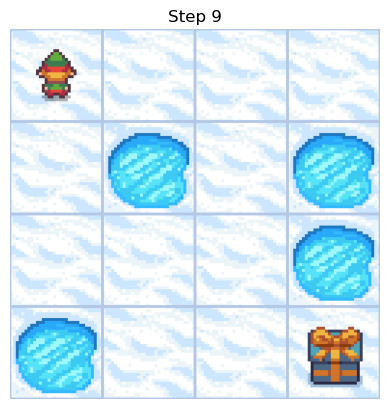

In [8]:
env = gym.make("FrozenLake-v1", render_mode="human")

state, info = env.reset()

print("Initial State:", state)

for _ in range(10):
    action = env.action_space.sample() 
    state, reward, done, truncated, info = env.step(action)
    print(f"State: {state}, Reward: {reward}, Done: {done}")
    if done or truncated:
        state, info = env.reset()

env = gym.make("FrozenLake-v1", render_mode="rgb_array")
state, info = env.reset()
print("Initial state:", state)

frames = []
for _ in range(10):
    frame = env.render()
    frames.append(frame)
    action = env.action_space.sample()
    state, reward, done, truncated, info = env.step(action)
    if done or truncated:
        break

plt.imshow(frames[-1])
plt.axis("off")
plt.show()

import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display
import time

env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")

state, info = env.reset()

for step in range(10):
    frame = env.render()
    
    plt.imshow(frame)
    plt.axis("off")
    plt.title(f"Step {step}")
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    action = env.action_space.sample()
    state, reward, done, truncated, info = env.step(action)
    
    time.sleep(0.4)
    
    if done or truncated:
        state, info = env.reset()

env.close()


holes = [5, 7, 11, 12]
goal = 15

for step in range(10):
    action = env.action_space.sample()
    state, reward, done, truncated, info = env.step(action)
    
    print(f"Step {step}: Action={action}, State={state}, Reward={reward}")
    
    if state in holes:
        print("Fell into a hole!\n")
    elif state == goal:
        print("Reached the goal!\n")

    if done or truncated:
        state, info = env.reset()
        time.sleep(0.5)

env.close()


In [9]:
import numpy as np

episodes = 10000  # number of simulations
holes = [5, 7, 11, 12]

hole_streaks = 0
consecutive_holes = 0

for episode in range(episodes):
    state, _ = env.reset()
    done = False
    
    while not done:
        action = env.action_space.sample()
        next_state, reward, done, truncated, info = env.step(action)
        
        # Check if fell in a hole
        if next_state in holes:
            consecutive_holes += 1
        else:
            consecutive_holes = 0  
        
        if consecutive_holes == 3:
            hole_streaks += 1
            consecutive_holes = 0 

# Theoretical probability
theoretical_p = (0.25) ** 3

# Empirical probability
empirical_p = hole_streaks / episodes

print(f"Theoretical probability (0.25³): {theoretical_p:.5f}")
print(f"Empirical probability (from simulation): {empirical_p:.5f}")

Theoretical probability (0.25³): 0.01562
Empirical probability (from simulation): 0.00000


## Conclusion
>Finally have came to a conclusion since I have lost hope in this guy. Out of 100 trials, the chance of the character falling into holes 3 times in a row theoretically is 0.01562% while empirically is literally 0%